# Set up

In [1]:
import pandas as pd

In [59]:
from openpyxl import load_workbook
from openpyxl.chart import (BarChart, PieChart, Reference)
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font
import os
import sys

# Load the Excel File

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\AI ML\Projects\Automate Excel\superstore_final_dataset (1).csv",
                 encoding='ISO-8859–1')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [3]:
# Shape of the dataframe
df.shape

(9800, 18)

# Creating a pivot table

- A pivot table in Excel is a powerful feature that allows users to summarize and analyze large amounts of data quickly and efficiently. It allows you to rearrange and manipulate data from a table or range of cells to create a summary report with just a few clicks.

- By using a pivot table, you can easily organize and summarize your data in various ways, such as by adding and rearranging columns and rows, applying filters, calculating totals and averages, and even creating charts and graphs to visualize the data.


In [4]:
sub_df = df[['Sub_Category','Segment','Sales']]
sub_df

,Sub_Category,Segment,Sales
0,Bookcases,Consumer,261.9600
1,Chairs,Consumer,731.9400
2,Labels,Corporate,14.6200
3,Tables,Consumer,957.5775
4,Storage,Consumer,22.3680
...,...,...,...
9795,Binders,Corporate,3.7980
9796,Art,Corporate,10.3680
9797,Phones,Corporate,235.1880
9798,Phones,Corporate,26.3760


In [5]:
pivot_table = sub_df.pivot_table(index = 'Segment', columns = 'Sub_Category', values = 'Sales', aggfunc = 'sum').round(0)

In [6]:
pivot_table

Sub_Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Segment,,,,,,,,,,,,,,,,,
Consumer,85699.0,52367.0,14062.0,117092.0,67949.0,171174.0,66539.0,7632.0,1675.0,48725.0,6611.0,79543.0,35600.0,169231.0,98783.0,25531.0,99848.0
Corporate,46593.0,34170.0,8526.0,50007.0,34006.0,95203.0,46829.0,5798.0,783.0,23979.0,4062.0,60277.0,23409.0,90343.0,77975.0,19400.0,67133.0
Home Office,31895.0,18081.0,4117.0,32930.0,11858.0,56445.0,32880.0,2699.0,544.0,16508.0,1675.0,49419.0,17820.0,68209.0,42585.0,1489.0,35829.0


In [7]:
print("Shape of the pivot table is: "+ str(pivot_table.shape))

Shape of the pivot table is: (3, 17)


In [8]:
pivot_table.to_excel('pivot_table.xlsx', encoding = 'UTF-8', startrow=5)

C:\Users\admin\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


# WorkBook Set Up

In [40]:
wb = load_workbook('pivot_table.xlsx')

In [12]:
sheet = wb['Sheet1']

In [13]:
max_column = wb.active.max_column
min_column = wb.active.min_column
min_row = wb.active.min_row
max_row = wb.active.max_row

In [14]:
print(max_column)
print(min_column)
print(max_row)
print(min_row)

18
1
9
6


# Creating a BarChart

In [15]:
barchart = BarChart()

In [16]:
data = Reference(sheet, min_col = min_column + 1, # A is the min value but for data B is the min value
                 max_col = max_column,
                 min_row = min_row,
                 max_row = max_row)

# headers are included in both data and categories

In [17]:
categories = Reference(sheet, min_col = min_column, 
                 max_col = min_column,
                 min_row = min_row+1,
                 max_row = max_row)

# for categories, the min and max columns are the same 

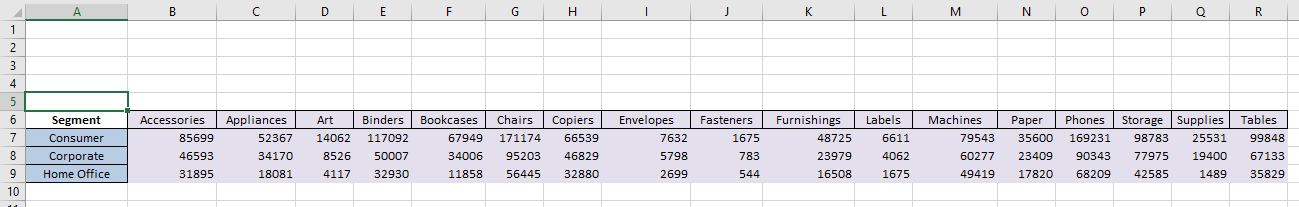

Blue -> Indicates Categories
<br> Purple -> Indicates Data

In [18]:
barchart.add_data(data, titles_from_data = True)
barchart.title = "Sales by Sub Categories"

barchart.set_categories(categories)
sheet.add_chart(barchart, "D14")
barchart.style = 5
wb.save("barchart.xlsx")

# Creating Excel Formula

In [61]:
'''
sheet['B5'] = '=SUM(B2:B4)' 
func to be carried out

sheet['B5'].style = 'Currency'   
cell is in currency format

f-string is used to format the strings.Helps to make the interpolation easier.
Interpolation is a technique mostly used to impute missing values in the data frame or series while preprocessing data.

'''

"\nsheet['B5'] = '=SUM(B2:B4)' \nfunc to be carried out\n\nsheet['B5'].style = 'Currency'   \ncell is in currency format\n\nf-string is used to format the strings.Helps to make the interpolation easier.\nInterpolation is a technique mostly used to impute missing values in the data frame or series while preprocessing data.\n\n"

In [62]:
for i in range(min_column+1, max_column+1):
    # to get the column letter for column numbers
    letter = get_column_letter(i) 
    
    # max_row+1 :- to locate the row after the max_row, where the sum of sales will be
    # min_row+1 :- to ignore the headers at row 1 and to get the values required
    
    # run this to make sure everything is working smoothly : print(f'=SUM({letter}{min_row+1}:{letter}{max_row})')
    sheet[f'{letter}{max_row+1}'] = f'=SUM({letter}{min_row+1}:{letter}{max_row})'
    sheet[f'{letter}{max_row+1}'].style = 'Currency'

# Cell Formating

In [23]:
sheet['A1'] = 'Sales Report'
sheet['A2'] = 'January'
sheet['A1'].font = Font("Times New Roman",bold = True, size = 20)
sheet['A2'].font = Font("Arial", bold = True, size = 10)

In [24]:
wb.save("January Report.xlsx")

# To generate Monthly Reports 

In [42]:
month = input('Introduce Month: ')

Introduce Month:  march


In [43]:
sheet['A1'] = 'Sales Report'
sheet['A2'] = month
sheet['A1'].font = Font("Times New Roman",bold = True, size = 20)
sheet['A2'].font = Font("Arial", bold = True, size = 10)

In [45]:
wb.save(f'{month} report.xlsx')

# To Generate Excel Reports faster

In [33]:
# to specify where the file path is located
application_path = os.path.dirname(sys.executable)

In [34]:
input_path = os.path.join(application_path, "pivot_table.xlsx")

In [35]:
output_path = os.path.join(application_path,f'{month} report.xlsx') 

In [38]:
# input and output paths are located in the same path as application path

In [46]:
# note to self: work on converting this to py then to exe